In [1]:
import pandas as pd
import numpy as np
import re
import os

In [2]:
def base_no_horizontal(base):
    base = base[
        (base['porteria'].isna()) &
        (base['conjuntocerrado']==0) &
        (base['tipoinmueble']=='Casa') &
        (base['ascensor'].isna()) &
        ((base['gimmasio'].isna()) | (base['gimnasio']==0)) &
        (base['piscina'].isna()) & 
        ((base['area']<1500) & (base['area']>35)) & 
        (base['piso']<5) &
        ((base['habitaciones']<15) & (base['habitaciones']>0)) &
        #Si encontramos gimnasios en la geocodificación comparar con los puntos que se quitaron
    ]
    return base

In [3]:
carpeta_path = r'C:\Users\William\Desktop\el algoritmo es correcto'
archivo_train = r'train_data.csv'
path_train = os.path.join(carpeta_path, archivo_train)

In [4]:
path_train

'C:\\Users\\William\\Desktop\\el algoritmo es correcto\\train_data.csv'

In [192]:
train = pd.read_csv(
    path_train, 
    dtype={
        "tiempodeconstruido": str,
        "vista": str,
        "tipoinmueble": str,
        "tiponegocio": str,
        'valorventa': 'int64',
        # 'area': 'int64'
    }
)

In [193]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244488 entries, 0 to 244487
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     244488 non-null  int64  
 1   area                   244110 non-null  float64
 2   ascensor               87672 non-null   float64
 3   balcon                 60181 non-null   float64
 4   banos                  243049 non-null  float64
 5   banoservicio           12231 non-null   float64
 6   conjuntocerrado        244488 non-null  int64  
 7   cuartoservicio         55492 non-null   float64
 8   deposito               107413 non-null  float64
 9   estrato                236806 non-null  float64
 10  estudio                76686 non-null   float64
 11  garajes                212861 non-null  float64
 12  gimnasio               72755 non-null   float64
 13  habitaciones           243731 non-null  float64
 14  halldealcobas          64640 non-nul

In [7]:
train.head()

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,tiempodeconstruido,vigilancia,vista,zonalavanderia,valoradministracion,valorventa,tipoinmueble,tiponegocio,latitud,longitud
0,1205404,55.0,NaN,NaN,NaN,NaN,0,NaN,1.0,3.0,...,NaN,NaN,NaN,1.0,50000.0,169950000,Casa,Venta,4.560965,-74.094889
1,1204371,43.0,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,90000000,Casa,Venta,4.576960,-74.100083
2,1125353,360.0,NaN,NaN,NaN,NaN,0,NaN,0.0,3.0,...,NaN,NaN,NaN,NaN,0.0,1100000000,Casa,Venta,4.575000,-74.101000
3,1125506,60.0,NaN,NaN,NaN,1.0,0,1.0,0.0,3.0,...,NaN,NaN,NaN,NaN,0.0,260000000,Apartamento,Venta,4.575924,-74.108039
4,1204569,72.0,NaN,NaN,NaN,NaN,0,NaN,0.0,2.0,...,NaN,NaN,NaN,1.0,0.0,125000000,Casa,Venta,4.559000,-74.097000


In [8]:
for columna in train.columns:
    if columna not in ['id', 'valoradministracion', 'valorventa', 'latitud', 'longitud']:
        print("{}: ".format(columna), train[columna].unique())

area:  [ 55.    43.   360.   ...  31.74  44.32  62.47]
ascensor:  [nan  1.]
balcon:  [nan  1.]
banos:  [ nan   0.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  23.  24.  25.  26.  27.  44.
   1.  35. 253.  71.  40.  33.]
banoservicio:  [nan  1.]
conjuntocerrado:  [0 1]
cuartoservicio:  [nan  1.]
deposito:  [ 1.  0. nan]
estrato:  [ 3. nan  2.  4.  5.  6.  1.  7.  0.]
estudio:  [nan  1.  0.]
garajes:  [nan  1.  2.  4.  3.  0.  5.  6. 10.  7.  9.  8.]
gimnasio:  [ 0.  1. nan]
habitaciones:  [  2.   3.  nan   5.   1.   4.  14.  10.   0.  17.  43.   6.  11.   9.
   8.  15.  12.   7.  18.  21.  30.  40.  23.  20.  34.  13.  33.  19.
  16.  85.  22.  24.  28.  25.  35.  32.  27.  26.  52. 253.  88.]
halldealcobas:  [nan  1.]
parqueaderovisitantes:  [nan  1.  0.]
piscina:  [nan  1.]
piso:  [nan  1.  2.  4.  3.  6.  9.  5.  7. 14. 13. 10. 11.  8. 12. 16. 15. 23.
 20. 17. 21. 18. 27. 19. 26. 28. 24. 22. 25. 30. 29.]
porteria:  [nan  1.]
re

In [213]:
prueba = train[
    (train['porteria'].isna()) &
    (train['conjuntocerrado']==0) &
    (train['tipoinmueble']=='Casa') &
    (train['ascensor'].isna()) &
    ((train['gimnasio'].isna()) | (train['gimnasio']==0)) &
    (train['piscina'].isna()) &
    ((train['area']<1500) & (train['area']>35)) &
    ((train['piso']<5) | (train['piso'].isna())) &
    ((train['habitaciones']<15) & (train['habitaciones']>0))
]#.groupby(['estrato','banos'], as_index=False).agg(**{'Cantidad': pd.NamedAgg('area', 'count')}).head(30)

In [238]:
#PENDIENTE GARAJE
# Piso y tiempo de construido, vigilancia, vista, zonalavanderia a categorica con no define
# No sirve, piscina, gimnasio, tiponegocio
prueba.groupby(['tiponegocio'], as_index=False, dropna=False).agg(**{'Cantidad': pd.NamedAgg('id', 'count')})

,tiponegocio,Cantidad
0,Arriendo,46
1,Venta,39571
2,Venta Y Arriendo,123
3,Venta y arriendo,938


In [242]:
prueba[prueba['tiponegocio']=='Venta y arriendo']['valorventa'].min()

105000000

In [219]:
prueba['banos'] = np.where(
    prueba['banos']==0 | prueba['banos'].isna(),
    1,
    np.where(
        prueba['banos']>5,
        5,
        prueba['banos']
    )
)

ipykernel_launcher:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [222]:
prueba['deposito'] = np.where(
    prueba['deposito']==0,
    'No',
    np.where(
        prueba['deposito']==1,
        'Si',
        'No define'
    )
)

ipykernel_launcher:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
prueba[['ascensor', 'balcon', 'banoservicio', 'cuartoservicio', 'estudio', 'gimnasio', 'halldealcobas', 'parqueaderovisitantes', 'remodelado', 'saloncomunal', 'terraza']]

In [214]:
prueba.shape

(40678, 32)

## Analizar columnas

### area

* file:///C:/Users/William/Downloads/406-Article%20Text-891-1-10-20181207%20(1).pdf

In [10]:
train['area'].describe().astype('int64')

count        244110
mean          16543
std         6307176
min               0
25%              69
50%             105
75%             184
max      3003514577
Name: area, dtype: int64

In [11]:
train['area'].quantile(np.linspace(0,1,21)).astype('int64')

0.00             0
0.05            46
0.10            52
0.15            58
0.20            63
0.25            69
0.30            74
0.35            80
0.40            88
0.45            96
0.50           105
0.55           116
0.60           129
0.65           144
0.70           161
0.75           184
0.80           210
0.85           247
0.90           295
0.95           380
1.00    3003514577
Name: area, dtype: int64

<AxesSubplot:>

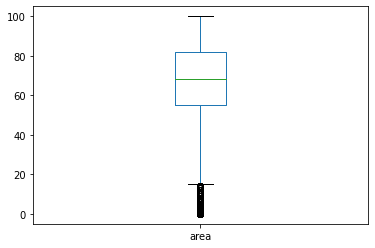

In [12]:
train[train['area']<=100]['area'].plot(kind='box')

<AxesSubplot:>

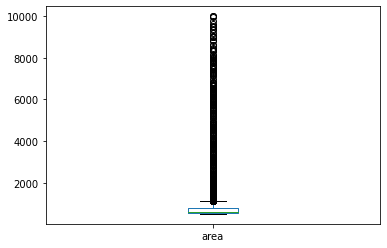

In [13]:
train[
    (train['area']>=500) &
    (train['area']<=10000)]['area'].plot(kind='box')

<AxesSubplot:>

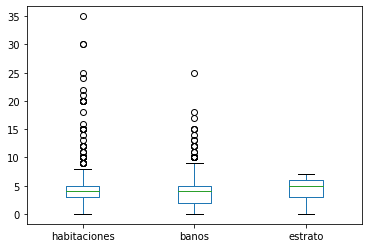

In [14]:
train[(train['area']>=1000)][['habitaciones', 'banos', 'estrato']].plot(kind = 'box')

In [15]:
train[(train['area']>=500) & (train['estrato']==0)]

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,tiempodeconstruido,vigilancia,vista,zonalavanderia,valoradministracion,valorventa,tipoinmueble,tiponegocio,latitud,longitud
71008,1037324,538.0,NaN,NaN,4.0,NaN,1,1.0,NaN,0.0,...,Entre 10 y 20 años,NaN,Exterior,1.0,4200000.0,6200000000,Apartamento,Venta,4.669413,-74.049070
77414,1304882,600.0,NaN,1.0,4.0,NaN,0,NaN,NaN,0.0,...,Entre 10 y 20 años,NaN,Exterior,NaN,NaN,1800000000,Casa,Venta,4.623459,-74.087550
85226,1040114,715.0,NaN,NaN,5.0,NaN,0,NaN,1.0,0.0,...,Más de 20 años,NaN,Exterior,1.0,0.0,980000000,Casa,Venta,4.625661,-74.151794
87965,721798,1365.0,1.0,1.0,5.0,NaN,1,NaN,1.0,0.0,...,Entre 10 y 20 años,NaN,Exterior,1.0,960000.0,1850000000,Casa,Venta,4.811730,-74.050095
88380,759440,1200.0,NaN,1.0,5.0,NaN,0,NaN,NaN,0.0,...,Entre 10 y 20 años,NaN,NaN,1.0,450000.0,7000000000,Casa,Venta,4.815586,-74.029870
227778,1035118,600.0,NaN,NaN,5.0,NaN,1,NaN,NaN,0.0,...,Entre 5 y 10 años,1.0,NaN,1.0,520000.0,2600000000,Casa,Venta,4.691776,-74.032510
228859,995171,530.0,1.0,NaN,5.0,NaN,1,1.0,NaN,0.0,...,Entre 10 y 20 años,1.0,Exterior,NaN,2100000.0,5500000000,Apartamento,Venta,4.692837,-74.025055
228861,1035611,530.0,1.0,NaN,5.0,NaN,0,1.0,NaN,0.0,...,Entre 5 y 10 años,1.0,Exterior,NaN,4000000.0,5000000000,Apartamento,Venta Y Arriendo,4.692837,-74.026460
229622,1315381,600.0,NaN,NaN,5.0,NaN,0,1.0,NaN,0.0,...,Más de 20 años,1.0,NaN,NaN,1750000.0,2500000000,Casa,Venta,4.820017,-74.066470
230214,1312583,600.0,NaN,NaN,5.0,NaN,1,NaN,1.0,0.0,...,Entre 5 y 10 años,1.0,NaN,1.0,1600000.0,2900000000,Casa,Venta,4.812912,-74.052956


In [16]:
# Propiedades con más de 20 años  es decir los que tengan más de 60 mts2
train[
    (train['tiempodeconstruido'].isin(['Entre 10 y 20 años','Más de 20 años','16 a 30 años'])) &
    (train['area']<60)
].shape

(8807, 32)

In [17]:
# Propiedades con más de 30 años  es decir los que tengan más de 80 mts2
train[
    (train['tiempodeconstruido']=='Más de 30 años') &
    (train['area']<80)
].shape

(1789, 32)

In [18]:
# Propiedades con menos de 20 años  es decir los que tengan más de 35 mts2
train[
    (train['tiempodeconstruido'].isin(
        ['Entre 10 y 20 años', 'Entre 0 y 5 años', 'Entre 5 y 10 años',
        '1 a 8 años', '9 a 15 años','Menos de 1 año','ntre 0 y 5 años'])) &
    (train['area']<35)
].shape

(1727, 32)

In [19]:
# Propiedades que de entrada no cumplen los 35 mts
train[(train['area']<35)].shape

(2569, 32)

In [20]:
train[(train['area']<35)][['id','area', 'habitaciones', 'banos', 'valorventa']]

,id,area,habitaciones,banos,valorventa
10,1136615,22.00,2.0,NaN,400000000
11,924220,33.33,1.0,NaN,250220000
12,1084087,34.00,3.0,NaN,190000000
23,1143172,34.00,2.0,NaN,100000000
47,1106890,5.00,3.0,NaN,269000000
...,...,...,...,...,...
244339,357365,25.00,1.0,1.0,160000000
244340,976360,25.00,1.0,1.0,155000000
244350,704843,30.00,1.0,1.0,250000000
244357,356585,0.00,3.0,1.0,200000000


In [21]:
train.loc[10]

id                         1136615
area                            22
ascensor                       NaN
balcon                         NaN
banos                          NaN
banoservicio                   NaN
conjuntocerrado                  0
cuartoservicio                 NaN
deposito                         0
estrato                          3
estudio                        NaN
garajes                        NaN
gimnasio                         0
habitaciones                     2
halldealcobas                  NaN
parqueaderovisitantes          NaN
piscina                        NaN
piso                           NaN
porteria                       NaN
remodelado                     NaN
saloncomunal                   NaN
terraza                        NaN
tiempodeconstruido             NaN
vigilancia                     NaN
vista                          NaN
zonalavanderia                 NaN
valoradministracion              0
valorventa               400000000
tipoinmueble        

In [22]:
train["y"] = train["valorventa"]/train["area"]

<AxesSubplot:title={'center':'y'}, xlabel='[estrato, habitaciones]'>

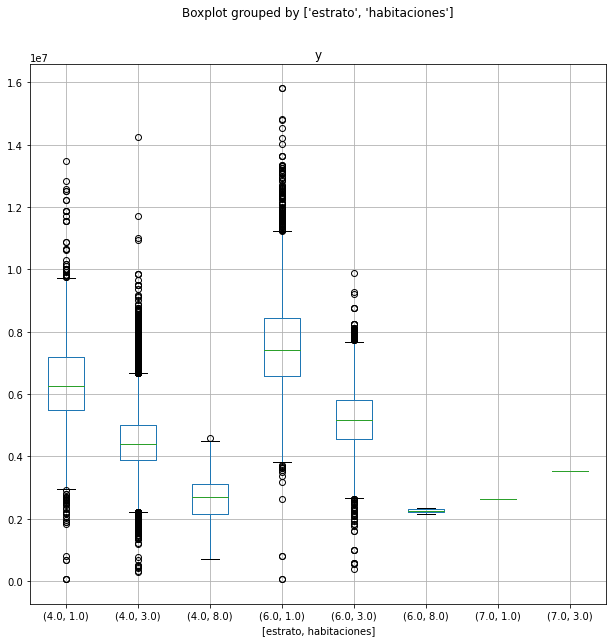

In [23]:
# train["y"]
f = train[
    (train.valorventa < 800000000) & 
    (train.valorventa > 100000000) &
    (train.area < 5000) &
    (train.area > 35) &
    (train.habitaciones.notna()) &
    (train.banos.notna()) &
    (train.estrato.isin([4,6,7])) &
    (train.habitaciones.isin([1,3,8])) &
    (train.piso < 5)
]
f[["y","estrato", "habitaciones"]].boxplot(by=["estrato", "habitaciones"], figsize=(10,10))

In [24]:
# id: 721798, 759440 Con estrato 0 son haciendas
# Zonas retiradas de bogotá

In [25]:
import geopandas

In [26]:
localidades_path = r'C:\Users\William\Desktop\el algoritmo es correcto\Datos abiertos bogota\localidades.json'
localidades = geopandas.read_file(localidades_path, crs={'init':'epsg:4686'})

In [27]:
# localidades_geo = localidades.plot(figsize=(10, 10), column='LocCodigo', zorder=1)

In [28]:
estratificacion_path = r'C:\Users\William\Desktop\el algoritmo es correcto\Datos abiertos bogota\manzana_estratificacion.json'
estratificacion = geopandas.read_file(estratificacion_path, crs={'init':'epsg:4686'})

In [29]:
casas = geopandas.GeoDataFrame(
    prueba, geometry=geopandas.points_from_xy(prueba.longitud, prueba.latitud), crs={'init': 'epsg:4326'})

C:\Users\William\AppData\Local\Programs\Python\Python37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [30]:
# localidades_geo = localidades.plot(color='white', edgecolor='black', figsize=(10, 10), zorder=1)
# estratificacion_geo = estratificacion.plot(ax=localidades_geo, figsize=(10, 10), zorder=2, cmap='OrRd', legend=True)
# casas_geo = casas.plot(ax=localidades_geo, figsize=(10, 10), markersize=.1, zorder=3, marker='x')

In [31]:
estrato_intersectado = geopandas.sjoin(left_df=casas, right_df=estratificacion, how='left', op='intersects')

ipykernel_launcher:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326



In [32]:
estrato_intersectado['ESTRATO'] = np.where(
    estrato_intersectado['ESTRATO'].isna() | estrato_intersectado['ESTRATO']==0,
    np.NaN,
    estrato_intersectado['ESTRATO']
)

In [33]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [34]:
train = estrato_intersectado.loc[estrato_intersectado['ESTRATO'].notna(),['ESTRATO', 'latitud', 'longitud']]
# test = estrato_intersectado.loc[estrato_intersectado['ESTRATO'].isnull(),['ESTRATO', 'latitud', 'longitud']]

In [35]:
X = train[['latitud', 'longitud']].values
y = train[['ESTRATO']].values
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15589, 2)
(6682, 2)
(15589, 1)
(6682, 1)


In [37]:
# Se crea el modelo con la base de entrenamiento
resultados = {}
for i in range(1,12):
    neigh = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    neigh.fit(X_train, y_train.ravel())
    resultados[i] = neigh.score(X_test, y_test)

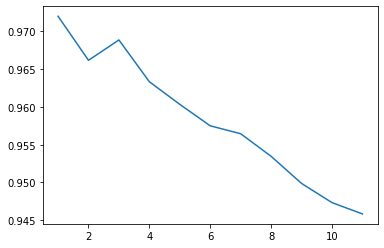

In [38]:
import matplotlib.pyplot as plt

plt.plot(list(resultados.keys()), list(resultados.values()))
plt.show()

In [39]:
neigh = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
neigh.fit(X_train, y_train.ravel())
y_pred = neigh.predict(X_test)

In [40]:
print("R^2: {}".format(neigh.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

R^2: 0.9688715953307393
Root Mean Squared Error: 0.2415900634439749
Accuracy: 0.9688715953307393


In [41]:
valores = estrato_intersectado.loc[estrato_intersectado['ESTRATO'].isnull(),['latitud', 'longitud']].values

In [42]:
estrato_intersectado.loc[estrato_intersectado['ESTRATO'].isnull(),'ESTRATO'] = neigh.predict(valores)

In [43]:
estrato_intersectado.groupby(['ESTRATO'], as_index=False, dropna=False).agg(**{'Cantidad': pd.NamedAgg('latitud','count')})

,ESTRATO,Cantidad
0,1.0,866
1,2.0,8317
2,3.0,15285
3,4.0,9273
4,5.0,5886
5,6.0,3091


In [44]:
a = estrato_intersectado['estrato'] - estrato_intersectado['ESTRATO']
pd.DataFrame(a, columns=['Dif Estrato']).reset_index(drop=False).rename(columns={'index':'Cantidad'}).groupby('Dif Estrato', as_index=False, dropna=False).count()

,Dif Estrato,Cantidad
0,-6.0,2
1,-5.0,35
2,-4.0,68
3,-3.0,384
4,-2.0,1024
5,-1.0,3098
6,0.0,31880
7,1.0,3598
8,2.0,633
9,3.0,223


### Paso 2: Piso de la casa

In [49]:
# estrato_intersectado[(estrato_intersectado['piso']>3)][['ESTRATO', 'habitaciones']]
estrato_intersectado.groupby(['piso'], as_index=False, dropna=False).agg(**{'Cantidad': pd.NamedAgg('ESTRATO', 'count')})

,piso,Cantidad
0,1.0,1314
1,2.0,4087
2,3.0,3895
3,4.0,1145
4,5.0,116
5,6.0,17
6,7.0,4
7,8.0,2
8,9.0,1
9,15.0,1


In [180]:
estrato_intersectado[estrato_intersectado['piso']<9].groupby(['piso', 'habitaciones']).area.quantile(np.linspace(0,1,11)).unstack(level=2).reset_index()
    # **{
    #     'Minimo': pd.NamedAgg('area', 'min'),
    #     'Mediana': pd.NamedAgg('area', 'median'),
    #     'Cuantil .8': pd.NamedAgg('area', lambda x: np.quantile(a=x, q=[0.8])),
    #     'Cuantil .9': pd.NamedAgg('area', lambda x: np.quantile(a=x, q=[0.9])),
    #     'Cuantil .95': pd.NamedAgg('area', lambda x: np.quantile(a=x, q=[0.95])),
    #     'Maximo': pd.NamedAgg('area', 'max')
    # })

,piso,habitaciones,0.0,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9,1.0
0,1.0,0.0,45.0,70.8,153.0,210.0,246.8,308.0,379.2,456.9,587.2,698.6,942.0
1,1.0,1.0,34.0,36.0,37.0,40.0,100.0,144.5,217.0,256.5,288.0,448.0,638.0
2,1.0,2.0,2.0,47.2,54.4,62.6,69.0,72.0,76.0,98.4,120.0,163.8,3965.0
3,1.0,3.0,30.0,72.0,85.0,101.5,120.0,138.5,165.0,188.0,220.0,288.0,1397.0
4,1.0,4.0,39.0,95.8,130.0,160.0,180.0,203.0,230.0,263.4,300.0,367.6,6540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,7.0,4.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0
122,7.0,9.0,457.0,457.0,457.0,457.0,457.0,457.0,457.0,457.0,457.0,457.0,457.0
123,7.0,13.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0
124,8.0,7.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0


<AxesSubplot:title={'center':'area'}, xlabel='[piso]'>

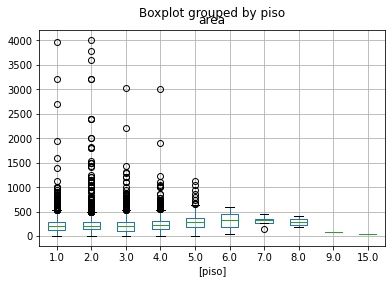

In [112]:
# 9 y 15 descartado 
# Reglas para definir los que son mayores o iguales de 5 pisos
estrato_intersectado[estrato_intersectado['area']<5000][['piso', 'area']].boxplot(by='piso')

In [151]:
avaluocatastral_path = r'C:\Users\William\Desktop\el algoritmo es correcto\Datos abiertos bogota\avaluo'
avaluocatastral = geopandas.read_file(avaluocatastral_path, crs={'init':'epsg:4686'})

In [243]:
avaluocatastral

,OBJECTID,MANZANA_ID,CP_TERR_AR,GRUPOP_TER,AVALUO_COM,AVALUO_CAT,OBSERVACIO,GLOBALID,SHAPE_Leng,SHAPE_Area,geometry
0,1,009259086,N,RESIDENCIAL,951874.0,733096.0,Este valor corresponde a la mediana y puede di...,{70BABE94-C17D-48FC-ADD0-BEF0283A45B4},0.002464,1.213815e-07,"POLYGON ((-74.12100 4.74751, -74.12101 4.74747..."
1,2,001355027,N,RESIDENCIAL,973208.0,666239.0,Este valor corresponde a la mediana y puede di...,{73AA8E80-CC4E-4DF5-887F-E1620A2356E4},0.000684,2.818937e-08,"POLYGON ((-74.09776 4.55222, -74.09776 4.55221..."
2,3,001355010,N,RESIDENCIAL,1100000.0,818602.0,Este valor corresponde a la mediana y puede di...,{ED6BDEF8-72FB-40F3-B4B5-A979800F5B47},0.000875,2.915943e-08,"POLYGON ((-74.09745 4.55194, -74.09747 4.55190..."
3,4,001355012,N,RESIDENCIAL,687104.0,469428.0,Este valor corresponde a la mediana y puede di...,{2EBCB819-9A4E-4F41-9A8B-0578AE28045A},0.001018,3.175301e-08,"POLYGON ((-74.09723 4.55258, -74.09718 4.55258..."
4,5,001355021,N,RESIDENCIAL,697258.0,474940.0,Este valor corresponde a la mediana y puede di...,{F25CC9EA-C4FA-49D6-9878-5EF2EBEE73FA},0.002131,9.812038e-08,"POLYGON ((-74.09668 4.55296, -74.09673 4.55288..."
...,...,...,...,...,...,...,...,...,...,...,...
43842,43843,002539009,N,RESIDENCIAL,613216.0,411971.0,Este valor corresponde a la mediana y puede di...,{1F31D653-612E-4058-A22C-F0B6DEAB66D2},0.002613,3.146819e-07,"POLYGON ((-74.15042 4.54514, -74.15038 4.54521..."
43843,43844,009263068,N,RESIDENCIAL,800000.0,561146.0,Este valor corresponde a la mediana y puede di...,{0904C68C-4568-4831-A0C9-B6903E3B0565},0.008599,1.403546e-06,"POLYGON ((-74.08607 4.72440, -74.08606 4.72440..."
43844,43845,None,None,None,0.0,0.0,Este valor corresponde a la mediana y puede di...,{3DF9EEB9-E5F8-40A2-B290-5DEC0C7F88AB},0.004493,1.263776e-06,"POLYGON ((-74.20958 4.62905, -74.21049 4.62863..."
43845,43846,001325032,N,LOTES,196734.0,163072.0,Este valor corresponde a la mediana y puede di...,{13FD0455-4AB7-41E9-9B7C-C0DA25854E31},0.015094,5.541504e-06,"POLYGON ((-74.08883 4.52689, -74.08883 4.52688..."


In [106]:
estrato_intersectado = geopandas.sjoin(left_df=casas, right_df=estratificacion, how='left', op='intersects')

array(['RESIDENCIAL', 'UNIVERSIDADES Y COLEGIOS', 'OTROS', 'OFICINAS',
       'LOTES', 'INDUSTRIA', 'BODEGAS', 'COMERCIO', None,
       'CLINICAS, HOSPITALES, CENTROS MEDIC', 'HOTELES'], dtype=object)

In [119]:
estrato_intersectado = estrato_intersectado.drop(columns=['index_right', 'CODIGO_MAN', 'CODIGO_ZON', 'CODIGO_CRI', 'NORMATIVA',
       'ACTO_ADMIN', 'NUMERO_ACT', 'FECHA_ACTO', 'ESCALA_CAP', 'FECHA_CAPT',
       'RESPONSABL', 'SHAPE_Leng', 'SHAPE_Area'])

In [156]:
avaluo_intersectado = geopandas.sjoin(left_df=estrato_intersectado, right_df=avaluocatastral, how='left', op='intersects')

ipykernel_launcher:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326



In [172]:
avaluo_intersectado[
    (avaluo_intersectado['piso'].isin([1,2,3,4]))].groupby(['CP_TERR_AR', 'piso', 'GRUPOP_TER'], as_index=False, dropna=False).ESTRATO.count().ESTRATO.sum()

10441

In [217]:
# prueba.groupby(['habitaciones'], as_index=False, dropna=False).agg(**{'Cantidad': pd.NamedAgg('estrato', 'count')})
prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40678 entries, 0 to 244487
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     40678 non-null  int64  
 1   area                   40678 non-null  float64
 2   ascensor               0 non-null      float64
 3   balcon                 3146 non-null   float64
 4   banos                  40354 non-null  float64
 5   banoservicio           2577 non-null   float64
 6   conjuntocerrado        40678 non-null  int64  
 7   cuartoservicio         8984 non-null   float64
 8   deposito               14216 non-null  float64
 9   estrato                39196 non-null  float64
 10  estudio                9228 non-null   float64
 11  garajes                30877 non-null  float64
 12  gimnasio               8457 non-null   float64
 13  habitaciones           40678 non-null  float64
 14  halldealcobas          8888 non-null   float64
 15  p